In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import glob

In [2]:
# reading the data into data frames using pandas
"""
stock_csv is a list of all stock CLOSE prices
index_csv is a list of all indicies
"""
stock_csv = []
index_csv = []
i = 0
for filename in glob.glob('data\index\*.csv'):
    index = pd.read_csv(filename)[['<DTYYYYMMDD>','<CLOSE>','<OPEN>']]
    if len(index) != 0:
        index_csv.append(index)
    i+=1

for filename in glob.glob('data\stocks\*.csv'):
    stock = pd.read_csv(filename)[['<DTYYYYMMDD>','<CLOSE>','<OPEN>', '<HIGH>', '<LOW>', '<VOL>']]
    if len(stock) != 0:
        stock_csv.append(stock)
    i+=1

In [73]:
### data cleaning
stocks = []
indices = []
# delete short data , not updated data and constant data.
for i in index_csv:
    if len(i.values[:,1]) > 1000 and \
    i.values[:,0][len(i.values[:,0])-1] > 20190000 and \
    np.var(i.values[-500:,1]) > 200 and \
    np.var(i.values[:500,1]) > 200:
        indices.append(i.values)
for s in stock_csv:
    if len(s.values[:,1]) > 700 and \
    s.values[:,0][len(s.values[:,0])-1] > 20190000 and \
    np.var(s.values[-500:,1]) > 200 and \
    np.var(s.values[:500,1]) > 200:
        # creating daily return price
        return_price = np.zeros(len(s.values))
        return_price[1:] = (s.values[1:,1] - s.values[:-1,1])/s.values[:-1,1]
        temp = s.values
        temp[:,5] = return_price
        stocks.append(temp)
    
stocks = np.array(stocks[15:]) # the first 15 were not good examples
indices = np.array(indices)

# date start point is : 20180600
start_date = 20180600
# firt cut off old indices , behind 2018 / 06 / 00
print("cutting old data...")
for count,index in enumerate(indices):
    del_index = 0
    for count2,entry in enumerate(index):
        if entry[0] >= start_date:
            del_index = count2
            break
    indices[count] = indices[count][del_index:]
# now the same for stocks
for count,stock in enumerate(stocks):
    del_index = 0
    for count2,entry in enumerate(stock):
        if entry[0] >= start_date:
            del_index = count2
            break
    stocks[count] = stocks[count][del_index:]

print("__Done__________________________")
print(f"number of stocks: {len(stocks)}")
print(f"number of indices: {len(indices)}")

cutting old data...
__Done__________________________
number of stocks: 572
number of indices: 51


424

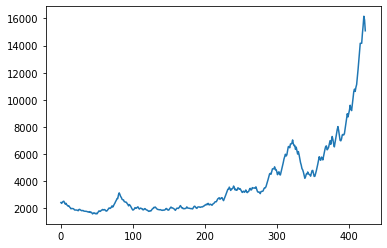

In [77]:
plt.plot(stocks[0][:,1])
len(stocks[0])

In [76]:
np.save("markets",indices)
np.save("stocks_1",stocks[:250])
np.save("stocks_2",stocks[250:])